In [2]:
import pandas as pd
import numpy as np
import matplotlib
from tqdm import tqdm, trange

In [3]:
df = pd.read_csv('electonic/events.csv')

In [4]:
electronics = df[df['category_code'].str.contains('electronics', na=False)]
elect = electronics.dropna(subset=['brand', 'user_session']) 

In [5]:
elect.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124602 entries, 14 to 885126
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   event_time     124602 non-null  object 
 1   event_type     124602 non-null  object 
 2   product_id     124602 non-null  int64  
 3   category_id    124602 non-null  int64  
 4   category_code  124602 non-null  object 
 5   brand          124602 non-null  object 
 6   price          124602 non-null  float64
 7   user_id        124602 non-null  int64  
 8   user_session   124602 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 9.5+ MB


In [6]:
elect.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
14,2020-09-24 12:00:01 UTC,view,1455459,2144415927049912542,electronics.video.tv,sony,635.63,1515915625519385419,sF2S2yMO09
19,2020-09-24 12:00:37 UTC,view,10914,2144415925053423789,electronics.camera.video,sony,40.95,1515915625519389726,kYKAorW97d
33,2020-09-24 12:02:19 UTC,view,3828758,2144415975410238005,electronics.audio.acoustic,eva,21.59,1515915625519390366,F71OG8wWVP
40,2020-09-24 12:03:01 UTC,view,3661285,2144415927049912542,electronics.video.tv,lg,810.68,1515915625470774320,HMot99bSay
46,2020-09-24 12:04:15 UTC,view,3149184,2144415921421156430,electronics.telephone,flexis,6.97,1515915625519391247,t5aw8VKVBj


In [7]:
elect.reset_index(inplace = True)

In [8]:
elect['month'] = np.nan
for i in trange(len(elect)):
    elect['month'][i] = elect['event_time'][i][:7]

c:\Users\choi\anaconda3\envs\kwater\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
  0%|          | 0/124602 [00:00<?, ?it/s]

c:\Users\choi\anaconda3\envs\kwater\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\Users\choi\anaconda3\envs\kwater\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\Users\choi\anaconda3\envs\kwater\lib\site-packages\pandas\core\series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pand

In [9]:
elect['view'] = np.nan
elect['cart'] = np.nan
elect['purchase'] = np.nan

c:\Users\choi\anaconda3\envs\kwater\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\Users\choi\anaconda3\envs\kwater\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\Users\choi\anaconda3\envs\kwater\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

In [10]:
for i in trange(len(elect)):
    if elect['event_type'][i] == 'view':
        elect['view'][i] = 1
    elif elect['event_type'][i] == 'cart':
        elect['cart'][i] = 1
    else:
        elect['purchase'][i] = 1

  0%|          | 0/124602 [00:00<?, ?it/s]c:\Users\choi\anaconda3\envs\kwater\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\Users\choi\anaconda3\envs\kwater\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
c:\Users\choi\anaconda3\envs\kwater\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

In [11]:
elect['purchase_price'] = np.nan
for i in trange(len(elect)):
    if elect['event_type'][i] == 'purchase':
        elect['purchase_price'][i] = elect['price'][i]

c:\Users\choi\anaconda3\envs\kwater\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
  0%|          | 0/124602 [00:00<?, ?it/s]c:\Users\choi\anaconda3\envs\kwater\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
100%|██████████| 124602/124602 [00:02<00:00, 60764.30it/s]


In [12]:
def func(x):

    d = {}

    d['view'] = x['view'].sum()

    d['cart'] = x['cart'].sum()

    d['purchase'] = x['purchase'].sum()

    d['cart/view'] = round(x['cart'].sum() / x['view'].sum(), 4)  * 100

    d['purchase/cart'] = round(x['purchase'].sum() / x['cart'].sum(), 4) * 100
    
    d['tot_price'] = x['purchase_price'].sum()

    d['price_per_purchase'] = round(x['purchase_price'].sum() / x['purchase'].sum(),2)

    return pd.Series(d, index=['view', 'cart', 'purchase', 'cart/view', 'purchase/cart', 'tot_price','price_per_purchase'])





In [13]:
elec_month= elect.groupby('month').apply(func)

In [14]:
elec_month

,view,cart,purchase,cart/view,purchase/cart,tot_price,price_per_purchase
month,,,,,,,
2020-09,3731.0,151.0,116.0,4.05,76.82,13545.43,116.77
2020-10,22402.0,982.0,720.0,4.38,73.32,69543.08,96.59
2020-11,26264.0,1137.0,817.0,4.33,71.86,78596.11,96.20
2020-12,21734.0,1161.0,788.0,5.34,67.87,84741.79,107.54
2021-01,21916.0,1036.0,731.0,4.73,70.56,60945.67,83.37
2021-02,19280.0,990.0,646.0,5.13,65.25,64645.20,100.07


In [15]:
import matplotlib.pyplot as plt

In [16]:
elec_month

,view,cart,purchase,cart/view,purchase/cart,tot_price,price_per_purchase
month,,,,,,,
2020-09,3731.0,151.0,116.0,4.05,76.82,13545.43,116.77
2020-10,22402.0,982.0,720.0,4.38,73.32,69543.08,96.59
2020-11,26264.0,1137.0,817.0,4.33,71.86,78596.11,96.20
2020-12,21734.0,1161.0,788.0,5.34,67.87,84741.79,107.54
2021-01,21916.0,1036.0,731.0,4.73,70.56,60945.67,83.37
2021-02,19280.0,990.0,646.0,5.13,65.25,64645.20,100.07


In [17]:
elec_month['view_percent'] = elec_month['view'] / elec_month['view'].sum() * 100
elec_month['cart_percent'] = elec_month['cart'] / elec_month['cart'].sum() * 100
elec_month['purchase_percent'] = elec_month['purchase'] / elec_month['purchase'].sum() * 100

In [18]:
elec_month

,view,cart,purchase,cart/view,purchase/cart,tot_price,price_per_purchase,view_percent,cart_percent,purchase_percent
month,,,,,,,,,,
2020-09,3731.0,151.0,116.0,4.05,76.82,13545.43,116.77,3.235149,2.767088,3.038240
2020-10,22402.0,982.0,720.0,4.38,73.32,69543.08,96.59,19.424766,17.995235,18.858041
2020-11,26264.0,1137.0,817.0,4.33,71.86,78596.11,96.20,22.773505,20.835624,21.398638
2020-12,21734.0,1161.0,788.0,5.34,67.87,84741.79,107.54,18.845544,21.275426,20.639078
2021-01,21916.0,1036.0,731.0,4.73,70.56,60945.67,83.37,19.003356,18.984790,19.146150
2021-02,19280.0,990.0,646.0,5.13,65.25,64645.20,100.07,16.717681,18.141836,16.919853


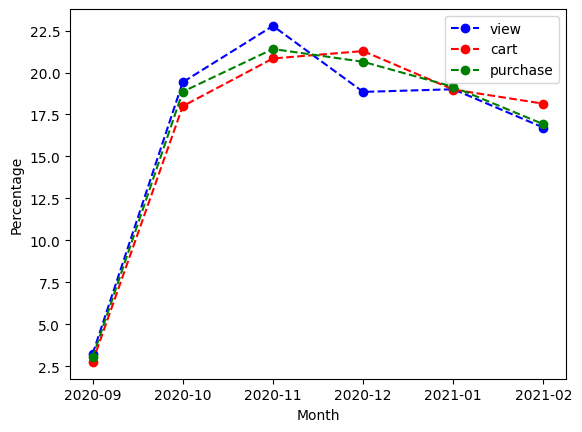

In [19]:
plt.plot(elec_month['view_percent'],'bo--', label = 'view')
plt.plot(elec_month['cart_percent'],'ro--', label = 'cart')
plt.plot(elec_month['purchase_percent'],'go--', label = 'purchase')
plt.xlabel('Month')
plt.ylabel('Percentage')
plt.legend()

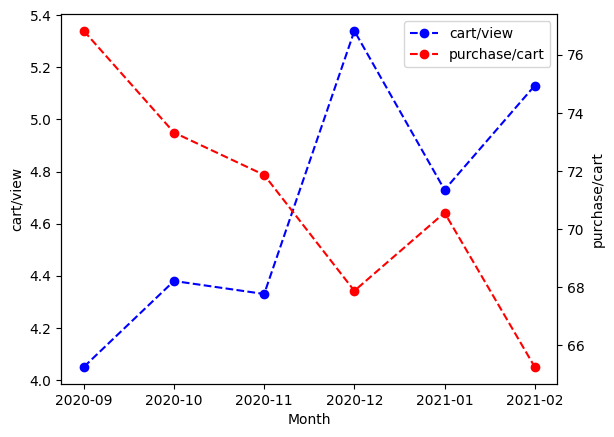

In [20]:
fig, ax1 = plt.subplots()
plt1 = ax1.plot(elec_month['cart/view'],'bo--', label = 'cart/view')
ax2 = ax1.twinx()
plt2 = ax2.plot(elec_month['purchase/cart'],'ro--', label = 'purchase/cart')
ax1.set_xlabel('Month')
ax1.set_ylabel('cart/view')
ax2.set_ylabel('purchase/cart')
plts = plt1 + plt2
labels = [l.get_label()  for l in plts]
ax1.legend(plts, labels, loc = 'upper right')

In [21]:
elec_month['ratio'] = elec_month['cart/view'] * elec_month['purchase/cart'] / 100

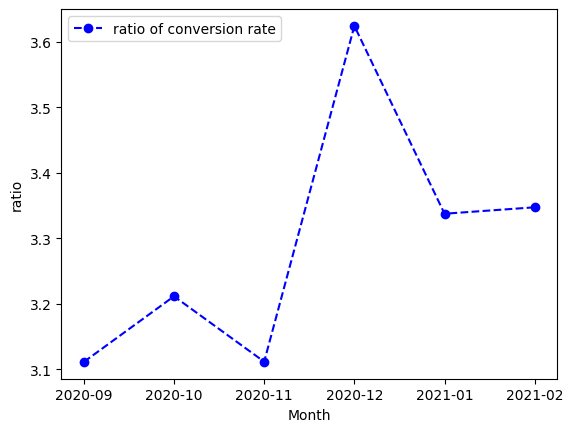

In [22]:
plt.plot(elec_month['ratio'],'bo--', label = 'ratio of conversion rate')
plt.xlabel('Month')
plt.ylabel('ratio')
plt.legend()

In [23]:
elec_month

,view,cart,purchase,cart/view,purchase/cart,tot_price,price_per_purchase,view_percent,cart_percent,purchase_percent,ratio
month,,,,,,,,,,,
2020-09,3731.0,151.0,116.0,4.05,76.82,13545.43,116.77,3.235149,2.767088,3.038240,3.111210
2020-10,22402.0,982.0,720.0,4.38,73.32,69543.08,96.59,19.424766,17.995235,18.858041,3.211416
2020-11,26264.0,1137.0,817.0,4.33,71.86,78596.11,96.20,22.773505,20.835624,21.398638,3.111538
2020-12,21734.0,1161.0,788.0,5.34,67.87,84741.79,107.54,18.845544,21.275426,20.639078,3.624258
2021-01,21916.0,1036.0,731.0,4.73,70.56,60945.67,83.37,19.003356,18.984790,19.146150,3.337488
2021-02,19280.0,990.0,646.0,5.13,65.25,64645.20,100.07,16.717681,18.141836,16.919853,3.347325


In [24]:
elec_cat_month = elect.groupby(['month','category_code']).apply(func)

c:\Users\choi\anaconda3\envs\kwater\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]
c:\Users\choi\anaconda3\envs\kwater\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()


In [25]:
ex_month = '2020-09'
num = []
cnt = 0
for i in elec_cat_month.index:
    if i[0] != ex_month:
        ex_month = i[0]
        num.append(cnt)
        cnt += 1
    else:
        cnt += 1
num.append(cnt)



In [26]:
num

[15, 30, 45, 60, 75, 90]

In [27]:
elec_cat_month.iloc[:num[0],:]

view  cart  purchase  \
month   category_code                                                 
2020-09 electronics.audio.acoustic            771.0  27.0      21.0   
        electronics.audio.dictaphone           11.0   1.0       1.0   
        electronics.audio.headphone           224.0   4.0       2.0   
        electronics.audio.microphone           88.0   4.0       3.0   
        electronics.audio.music_tools.piano     9.0   0.0       0.0   
        electronics.calculator                  7.0   1.0       1.0   
        electronics.camera.photo                4.0   0.0       0.0   
        electronics.camera.video               58.0   3.0       1.0   
        electronics.clocks                    111.0   4.0       0.0   
        electronics.fax                        12.0   0.0       0.0   
        electronics.tablet                    404.0  27.0      22.0   
        electronics.telephone                1435.0  63.0      55.0   
        electronics.video.projector            49.0   6.0       9.0   
        electronics.video.tv                  531.0  11.0       1.0   
        electronics.video.tv_remote            17.0   0.0       0.0   

                                             cart/view  purchase/cart  \
month   category_code                                                   
2020-09 electronics.audio.acoustic                3.50          77.78   
        electronics.audio.dictaphone              9.09         100.00   
        electronics.audio.headphone               1.79          50.00   
        electronics.audio.microphone              4.55          75.00   
        electronics.audio.music_tools.piano       0.00            NaN   
        electronics.calculator                   14.29         100.00   
        electronics.camera.photo                  0.00            NaN   
        electronics.camera.video                  5.17          33.33   
        electronics.clocks                        3.60           0.00   
        electronics.fax                           0.00            NaN   
        electronics.tablet                        6.68          81.48   
        electronics.telephone                     4.39          87.30   
        electronics.video.projector              12.24         150.00   
        electronics.video.tv                      2.07           9.09   
        electronics.video.tv_remote               0.00            NaN   

                                             tot_price  price_per_purchase  
month   category_code                                                       
2020-09 electronics.audio.acoustic             2480.88              118.14  
        electronics.audio.dictaphone             31.21               31.21  
        electronics.audio.headphone              56.03               28.02  
        electronics.audio.microphone            124.82               41.61  
        electronics.audio.music_tools.piano       0.00                 NaN  
        electronics.calculator                   17.25               17.25  
        electronics.camera.photo                  0.00                 NaN  
        electronics.camera.video                607.92              607.92  
        electronics.clocks                        0.00                 NaN  
        electronics.fax                           0.00                 NaN  
        electronics.tablet                     1609.39               73.15  
        electronics.telephone                  2633.30               47.88  
        electronics.video.projector            5566.61              618.51  
        electronics.video.tv                    418.02              418.02  
        electronics.video.tv_remote               0.00                 NaN

In [28]:
imp_cat = ['electronics.audio.acoustic','electronics.tablet','electronics.telephone','electronics.audio.headphone','electronics.video.tv']

In [29]:
elect_l = elect[elect['month'] != '2020-09']

In [30]:
elec_month_cat = elect_l[elect_l['category_code'].isin(imp_cat)].groupby(['category_code','month']).apply(func)

In [31]:
elec_month_cat

view   cart  purchase  cart/view  \
category_code               month                                         
electronics.audio.acoustic  2020-10  4625.0  209.0     167.0       4.52   
                            2020-11  5195.0  238.0     196.0       4.58   
                            2020-12  3885.0  192.0     151.0       4.94   
                            2021-01  4768.0  237.0     173.0       4.97   
                            2021-02  3839.0  171.0     109.0       4.45   
electronics.audio.headphone 2020-10  1264.0   27.0      16.0       2.14   
                            2020-11  1421.0   60.0      59.0       4.22   
                            2020-12  1226.0   70.0      52.0       5.71   
                            2021-01  1253.0   61.0      51.0       4.87   
                            2021-02  1135.0   48.0      29.0       4.23   
electronics.tablet          2020-10  2575.0  158.0     116.0       6.14   
                            2020-11  3219.0  175.0     135.0       5.44   
                            2020-12  2497.0  157.0     114.0       6.29   
                            2021-01  2506.0  127.0      76.0       5.07   
                            2021-02  1918.0  112.0      70.0       5.84   
electronics.telephone       2020-10  8791.0  446.0     312.0       5.07   
                            2020-11  9508.0  474.0     317.0       4.99   
                            2020-12  7907.0  489.0     325.0       6.18   
                            2021-01  8126.0  419.0     310.0       5.16   
                            2021-02  7340.0  424.0     275.0       5.78   
electronics.video.tv        2020-10  3227.0   64.0      42.0       1.98   
                            2020-11  4803.0   99.0      55.0       2.06   
                            2020-12  4219.0  154.0      67.0       3.65   
                            2021-01  3593.0  130.0      76.0       3.62   
                            2021-02  3505.0  177.0     119.0       5.05   

                                     purchase/cart  tot_price  \
category_code               month                               
electronics.audio.acoustic  2020-10          79.90   12928.36   
                            2020-11          82.35   20156.17   
                            2020-12          78.65   16464.27   
                            2021-01          73.00   17774.53   
                            2021-02          63.74   12818.66   
electronics.audio.headphone 2020-10          59.26     543.15   
                            2020-11          98.33    5360.64   
                            2020-12          74.29    4995.70   
                            2021-01          83.61    5969.89   
                            2021-02          60.42    2936.51   
electronics.tablet          2020-10          73.42   10497.51   
                            2020-11          77.14   14125.75   
                            2020-12          72.61   12963.28   
                            2021-01          59.84    5949.47   
                            2021-02          62.50    4455.02   
electronics.telephone       2020-10          69.96   15723.48   
                            2020-11          66.88   14859.55   
                            2020-12          66.46   18315.42   
                            2021-01          73.99   17268.71   
                            2021-02          64.86   14372.05   
electronics.video.tv        2020-10          65.62   11333.80   
                            2020-11          55.56    7788.61   
                            2020-12          43.51    8540.80   
                            2021-01          58.46   10023.38   
                            2021-02          67.23   17269.46   

                                     price_per_purchase  
category_code               month                        
electronics.audio.acoustic  2020-10               77.42  
                            2020-11              102.84  
                         

In [32]:
elec_month_cat.reset_index(inplace = True)

In [33]:
elec_month_cat.set_index('month', inplace = True)

In [34]:
elec_month_cat

,category_code,view,cart,purchase,cart/view,purchase/cart,tot_price,price_per_purchase
month,,,,,,,,
2020-10,electronics.audio.acoustic,4625.0,209.0,167.0,4.52,79.90,12928.36,77.42
2020-11,electronics.audio.acoustic,5195.0,238.0,196.0,4.58,82.35,20156.17,102.84
2020-12,electronics.audio.acoustic,3885.0,192.0,151.0,4.94,78.65,16464.27,109.03
2021-01,electronics.audio.acoustic,4768.0,237.0,173.0,4.97,73.00,17774.53,102.74
2021-02,electronics.audio.acoustic,3839.0,171.0,109.0,4.45,63.74,12818.66,117.60
2020-10,electronics.audio.headphone,1264.0,27.0,16.0,2.14,59.26,543.15,33.95
2020-11,electronics.audio.headphone,1421.0,60.0,59.0,4.22,98.33,5360.64,90.86
2020-12,electronics.audio.headphone,1226.0,70.0,52.0,5.71,74.29,4995.70,96.07
2021-01,electronics.audio.headphone,1253.0,61.0,51.0,4.87,83.61,5969.89,117.06


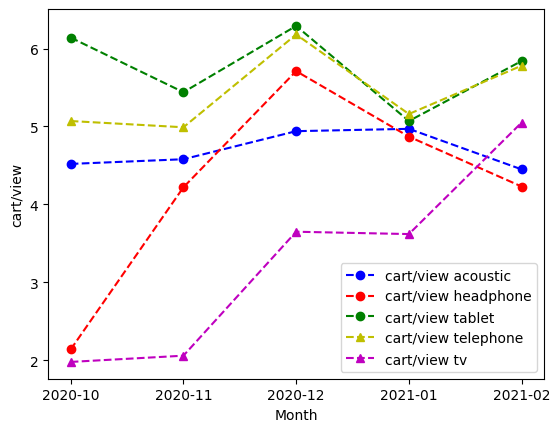

In [41]:
fig, ax1 = plt.subplots()
plt10 = ax1.plot(elec_month_cat[elec_month_cat['category_code'] == 'electronics.audio.acoustic']['cart/view'],'bo--', label = 'cart/view acoustic')
plt11 = ax1.plot(elec_month_cat[elec_month_cat['category_code'] == 'electronics.audio.headphone']['cart/view'],'ro--', label = 'cart/view headphone')
plt12 = ax1.plot(elec_month_cat[elec_month_cat['category_code'] == 'electronics.tablet']['cart/view'],'go--', label = 'cart/view tablet')
plt13 = ax1.plot(elec_month_cat[elec_month_cat['category_code'] == 'electronics.telephone']['cart/view'],'y^--', label = 'cart/view telephone')
plt14 = ax1.plot(elec_month_cat[elec_month_cat['category_code'] == 'electronics.video.tv']['cart/view'],'m^--', label = 'cart/view tv')
# ax2 = ax1.twinx()
# plt20 = ax2.plot(elec_month_cat[elec_month_cat['category_code'] == 'electronics.audio.acoustic']['purchase/cart'],'bo--', label = 'purchase/cart acoustic')
# plt21 = ax2.plot(elec_month_cat[elec_month_cat['category_code'] == 'electronics.audio.headphone']['purchase/cart'],'bo--', label = 'purchase/cart headphone')
# plt22 = ax2.plot(elec_month_cat[elec_month_cat['category_code'] == 'electronics.tablet']['purchase/cart'],'bo--', label = 'purchase/cart tablet')
# plt23 = ax2.plot(elec_month_cat[elec_month_cat['category_code'] == 'electronics.telephone']['purchase/cart'],'bo--', label = 'purchase/cart telephone')
# plt24 = ax2.plot(elec_month_cat[elec_month_cat['category_code'] == 'electronics.video.tv']['purchase/cart'],'bo--', label = 'purchase/cart tv')
ax1.set_xlabel('Month')
ax1.set_ylabel('cart/view')
# ax2.set_ylabel('purchase/cart')
plts = plt10 + plt11 + plt12 + plt13 + plt14 
#+ plt20 + plt21 + plt22 + plt23 + plt24
labels = [l.get_label()  for l in plts]
ax1.legend(plts, labels, loc = 'lower right')

In [40]:
elec_month_cat.groupby('category_code')['view','cart','purchase'].agg('sum')

c:\Users\choi\anaconda3\envs\kwater\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,view,cart,purchase
category_code,,,
electronics.audio.acoustic,22312.0,1047.0,796.0
electronics.audio.headphone,6299.0,266.0,207.0
electronics.tablet,12715.0,729.0,511.0
electronics.telephone,41672.0,2252.0,1539.0
electronics.video.tv,19347.0,624.0,359.0


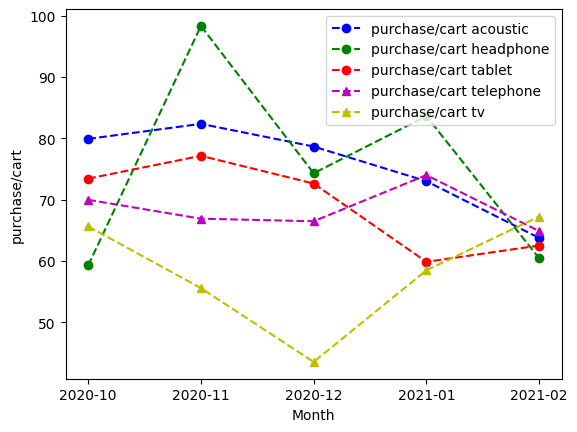

In [45]:
fig, ax1 = plt.subplots()
plt20 = ax1.plot(elec_month_cat[elec_month_cat['category_code'] == 'electronics.audio.acoustic']['purchase/cart'],'bo--', label = 'purchase/cart acoustic')
plt21 = ax1.plot(elec_month_cat[elec_month_cat['category_code'] == 'electronics.audio.headphone']['purchase/cart'],'go--', label = 'purchase/cart headphone')
plt22 = ax1.plot(elec_month_cat[elec_month_cat['category_code'] == 'electronics.tablet']['purchase/cart'],'ro--', label = 'purchase/cart tablet')
plt23 = ax1.plot(elec_month_cat[elec_month_cat['category_code'] == 'electronics.telephone']['purchase/cart'],'m^--', label = 'purchase/cart telephone')
plt24 = ax1.plot(elec_month_cat[elec_month_cat['category_code'] == 'electronics.video.tv']['purchase/cart'],'y^--', label = 'purchase/cart tv')
ax1.set_xlabel('Month')
# ax1.set_ylabel('cart/view')
ax1.set_ylabel('purchase/cart')
# plts = plt10 + plt11 + plt12 + plt13 + plt14 
plts =  plt20 + plt21 + plt22 + plt23 + plt24
labels = [l.get_label()  for l in plts]
ax1.legend(plts, labels, loc = 'upper right')